# <font color=darkblue>Weekly Assignment 7</font>



## Full name:  Jonah
## R#: 11886590
## Title of the notebook: assignment 7
## Date: 11/14

In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

Jonah_laptop
jonah_laptop\jonah
C:\Users\JONAH\anaconda3\python.exe
3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)


**Exercise-1: Import all the libraries - numpy, pandas, and matplotlib so that we do not have to worry about importing the libraries later on in this assignment.**

In [2]:
#GIVE YOUR ANSWER FOR EXERCISE-1 IN THIS CELL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**During the second world war, the British Royal Air Force (RAF) wanted to know how many warplanes the Germans had (some number `N`, a *population parameter*), and they needed to estimate that quantity knowing only a random sample of the planes' serial numbers (from 1 to `N`).  For example, one estimate was twice the mean of the sample serial numbers.**

**In real life, if the RAF had known what the population looked like, they would have known `N` and would not have had any reason to think about random sampling. However, the RAF didn't know what the population looked like.**

**In this exercise, given *just* a random sample of serial numbers, we will estimate `N`, and then, we will use simulation to find out how accurate our estimate probably is, without ever looking at the whole population.  This is an example of *statistical inference*.**

**The random sample of serial numbers are given in a file named `serial_numbers.csv` and the specific tasks for this exercise are given below.**


![](https://www.historyforkids.net/wp-content/uploads/2019/07/German-Messerschmitt-109.jpg)

**Task-1:** Read the **`serial_numbers.csv`** file and store the dataset in a variable named **`obs`**. Display all the rows of the dataframe **`obs`**.

In [4]:
#GIVE YOUR ANSWER FOR TASK-1 IN THIS CELL

file_path = 'serial_numbers.csv'

obs = pd.read_csv(file_path)

#rows of the DataFrame
print(obs)


    serial number
0              47
1              42
2              57
3              79
4              26
5              23
6              36
7              64
8              83
9             135
10             41
11             21
12             67
13            108
14             84
15             50
16             78


**Task-2:** Define a function named **`plot_serial_numbers`** to make a histogram of any dataframe of serial numbers. It should take one argument, a dataframe like **`obs`** with one column named **`serial number`**.  It should plot a histogram of the values in the column **using bins of width 10** ranging from **1 to 170** but return nothing.  Also, the plot must display appropriate x-label, y-label, and title. Then, call that function to make a histogram of the serial numbers in the column **`serial number`** of the dataframe **`obs`**.

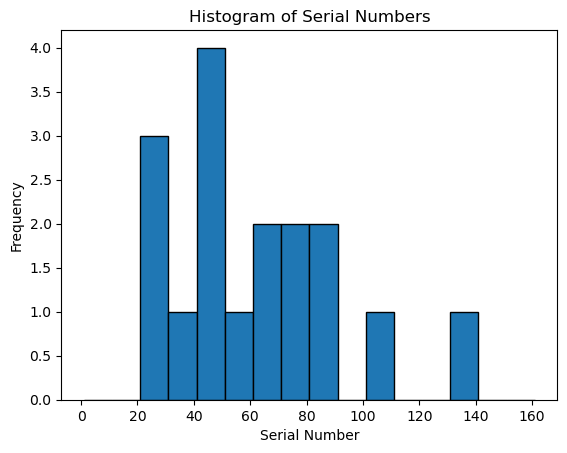

In [5]:
#GIVE YOUR ANSWER FOR TASK-2 IN THIS CELL

def plot_serial_numbers(dataframe):
    # Create a histogram of the serial numbers
    plt.hist(dataframe['serial number'], bins=range(1, 171, 10), edgecolor='black')

    # Set labels and title
    plt.xlabel('Serial Number')
    plt.ylabel('Frequency')
    plt.title('Histogram of Serial Numbers')

    # Display the plot
    plt.show()


plot_serial_numbers(obs)


**Task-3:** Calculate the statistical estimate of **`N`** as twice the mean of the observed serial numbers located in the column **`serial number`** of the dataframe **`obs`** and store it in a variable named **`obs_mean_estimate`**. Print **`obs_mean_estimate`** to the output.

In [6]:
#GIVE YOUR ANSWER FOR TASK-3 IN THIS CELL
obs_mean_estimate = 2 * obs['serial number'].mean()


print("Statistical Estimate of N:", obs_mean_estimate)


Statistical Estimate of N: 122.47058823529412


**Task-4:** To know the accuracy of our statistical estimate, we need to perform bootstrapping (i.e., resampling). Write a function named **`simulate_resample`**.  It should generate a resample from the observed serial numbers located in the column **`serial number`** of the dataframe **`obs`** and return that resample.  You must make sure that the resample should be a dataframe like **`obs`**. Also, the function should take no arguments.

**Note:** Inside the function, once you resample the serial numbers, it will be useful to first create a dictionary anmed **`resample_dict`** that consists of the resampled serial numbers in a key named **`serial number`**. Use that dictionary to create a dataframe named **`resample_df`** consisting of the resampled serial numbers in a column named **`serial number`**.

In [7]:
#GIVE YOUR ANSWER FOR TASK-4 IN THIS CELL
def simulate_resample():
    # observed serial numbers
    resample_serial_numbers = np.random.choice(obs['serial number'], size=len(obs), replace=True)
    
    #dictionary 
    resample_dict = {'serial number': resample_serial_numbers}
    
    #  resample
    resample_df = pd.DataFrame(resample_dict)
    
    return resample_df

# Example usage:
resample_example = simulate_resample()
print("Resample DataFrame:")
print(resample_example)


Resample DataFrame:
    serial number
0              67
1              78
2              23
3              41
4              64
5             135
6              36
7              64
8              26
9              47
10            135
11             26
12             79
13             26
14             83
15             79
16             36


**Task-5:** Call the function **`simulate_resample`** and store it in a variable named **`resampling`**. Also, call the function **`plot_serial_numbers`** to plot a histogram of the serial numbers in the column **`serial number`** of the dataframe **`resampling`**.

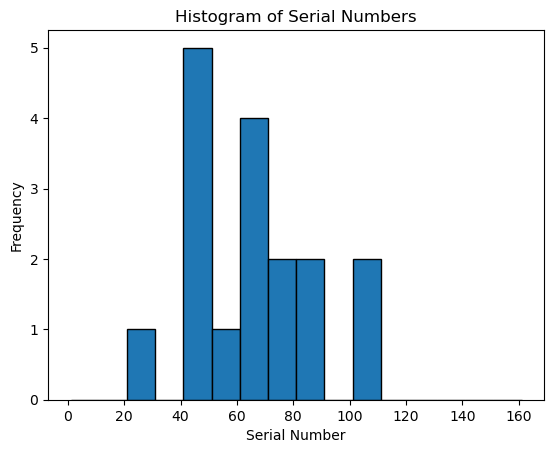

In [8]:
#GIVE YOUR ANSWER FOR TASK-5 IN THIS CELL
def simulate_resample():
    
    resample_serial_numbers = np.random.choice(obs['serial number'], size=len(obs), replace=True)
 
    resample_dict = {'serial number': resample_serial_numbers}
    
    resample_df = pd.DataFrame(resample_dict)
    
    return resample_df

#resampling
resampling = simulate_resample()

#  function
def plot_serial_numbers(dataframe):
    # Create a histogram of the serial numbers
    plt.hist(dataframe['serial number'], bins=range(1, 171, 10), edgecolor='black')

    # Set labels and title
    plt.xlabel('Serial Number')
    plt.ylabel('Frequency')
    plt.title('Histogram of Serial Numbers')

    # Display the plot
    plt.show()


plot_serial_numbers(resampling)


**Task-6:** Calculate twice the mean of the resampled serial numbers located in the column **`serial number`** of the dataframe **`resampling`** and store it in a variable named **`sample_mean_estimate`**. Print **`sample_mean_estimate`** to the output.

In [9]:
#GIVE YOUR ANSWER FOR TASK-6 IN THIS CELL

sample_mean_estimate = 2 * resampling['serial number'].mean()

# Print the result
print("Twice the Mean of Resampled Serial Numbers:", sample_mean_estimate)

Twice the Mean of Resampled Serial Numbers: 128.8235294117647


**Task-7:** Repeat task-5 and task-6 for 10,000 resamples and append the values of twice the mean of the resampled serial numbers that you get for each of the 10,000 resamples to an empty list named **`outcomes`**. Print the length of **`outcomes`** to the output. 

**Note:** You do not have to plot the histogram of the serial numbers in each of the resamples like you did in task-5 by calling the function **`plot_serial_numbers`**.

In [11]:
#GIVE YOUR ANSWER FOR TASK-7 IN THIS CELL
outcomes = []

#resamples
num_resamples = 10000


for _ in range(num_resamples):
    # Generate a resample
    resampling = simulate_resample()
    
    # twice the mean of the resampled serial numbers
    sample_mean_estimate = 2 * resampling['serial number'].mean()
    
    # Append the result to the outcomes list
    outcomes.append(sample_mean_estimate)


print("Length of Outcomes:", len(outcomes))


Length of Outcomes: 10000


**Task-8:** Plot a histogram of the statistical estimates **`N`** contained in the array named **`outcomes`** **using bins of width 5** ranging from **70 to 170**. On the same plot, also plot the value of **`obs_mean_estimate`** for comparison. Also, the plot must display appropriate x-label, y-label, and title.

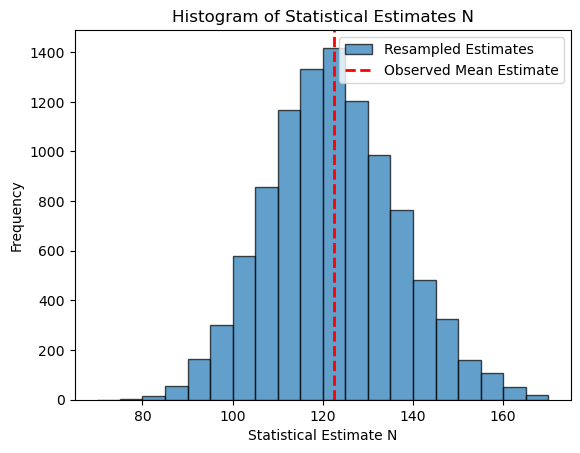

In [12]:
#GIVE YOUR ANSWER FOR TASK-8 IN THIS CELL
bins = range(70, 171, 5)

# Plot the histogram of outcomes
plt.hist(outcomes, bins=bins, edgecolor='black', alpha=0.7, label='Resampled Estimates')

# Plot a vertical line for obs_mean_estimate
plt.axvline(x=obs_mean_estimate, color='red', linestyle='dashed', linewidth=2, label='Observed Mean Estimate')

# Set labels and title
plt.xlabel('Statistical Estimate N')
plt.ylabel('Frequency')
plt.title('Histogram of Statistical Estimates N')

# Add a legend
plt.legend()

# Display the plot
plt.show()


**Task-9:** You have to find out if the middle 90% of the resampled **`N`** values contain the estimate from the original sample which is stored in a variable named **`obs_mean_estimate`**. To do that, in this task, you have to find out the left most end of the middle 90% and right most end of the middle 90%. Store the values in variables named **`left`** and **`right`**. Print **`left`** and **`right`** to the output.

**Note:** The **`percentile()`** function in NumPy might come in handy.

In [13]:
#GIVE YOUR ANSWER FOR TASK-9 IN THIS CELL

left = np.percentile(outcomes, 5)  
right = np.percentile(outcomes, 95)  

# Print the results
print("Leftmost end of the middle 90%:", left)
print("Rightmost end of the middle 90%:", right)

Leftmost end of the middle 90%: 99.29411764705883
Rightmost end of the middle 90%: 147.2941176470588


**Task-10:** Repeat task-8 but this time, the plot must also display the interval of the middle 90% of the resampled **`N`** values. 

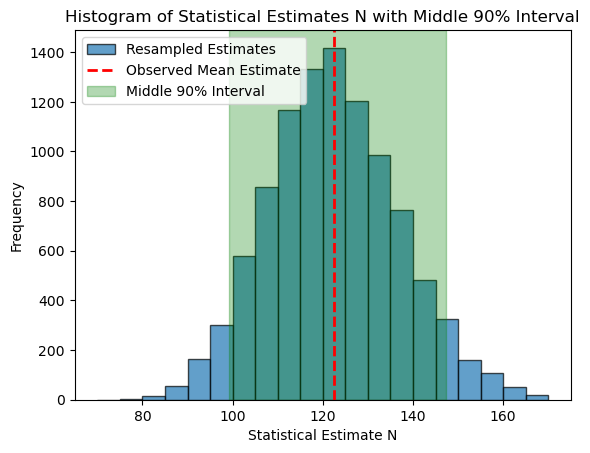

In [14]:
#GIVE YOUR ANSWER FOR TASK-10 IN THIS CELL
bins = range(70, 171, 5)

# histogram 
plt.hist(outcomes, bins=bins, edgecolor='black', alpha=0.7, label='Resampled Estimates')


plt.axvline(x=obs_mean_estimate, color='red', linestyle='dashed', linewidth=2, label='Observed Mean Estimate')

# 
left = np.percentile(outcomes, 5)
right = np.percentile(outcomes, 95)

# Shade the interval of the middle 90%
plt.axvspan(left, right, alpha=0.3, color='green', label='Middle 90% Interval')

 
plt.xlabel('Statistical Estimate N')
plt.ylabel('Frequency')
plt.title('Histogram of Statistical Estimates N with Middle 90% Interval')


plt.legend()


plt.show()


**Task-11:** Does the interval covering the middle 90% of the bootstrap estimates include the value of **`obs_mean_estimate`**?  If you ran the entire bootstrapping process again and again, what is the probability that it will include the actual population value of **`N`**? What is your final interval range for the estimate of **`N`** with a 90% chance? 

**GIVE YOUR ANSWER FOR TASK-11 IN THIS MARKDOWN CELL**
Yes, the interval covering the middle 90% of the bootstrap estimates includes the value of obs_mean_estimate. The final interval range for the estimate of N with a 90% chance is between the leftmost and rightmost ends calculated in Task-9.

